# Importing Libraries & Setting Standards

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# setting figure size
plt.rcParams['figure.figsize'] = (12, 6)

 Dataframes and use in notebook
 - "raw_data" --> df of original, formatted temp data
 - "df_1" --> data with timestep in to calculate trend
 - "df_2" --> df of just 10 years with Day of Year extracted

# Generating raw data set with train-test split

In [3]:
# reading in data and creating df
raw_data = pd.read_csv('./data/data_BER_Mean_Temp.txt', sep=",", skiprows=19)
raw_data.columns = ["ID", "Date", "Temp", "Quality"]
raw_data.drop(['ID', 'Quality'], axis=1, inplace=True)   #<--- these values were confirmed as OK to drop in EDA

In [4]:
# generating datetimeseries index from Date column
raw_data['Date'] = raw_data['Date'].astype(str)
raw_data['Date'] = pd.to_datetime(raw_data['Date'])
raw_data = raw_data.set_index('Date')

In [5]:
# converting Temp values to readable float numbers
raw_data['Temp_C'] = raw_data['Temp']*0.1
raw_data.drop(['Temp'], axis=1, inplace=True)

In [6]:
# confirming raw data set in ideal workable condition and all changes occured without error
raw_data.head()

,Temp_C
Date,
1951-01-01,-4.0
1951-01-02,-1.4
1951-01-03,-1.2
1951-01-04,0.4
1951-01-05,2.5


In [7]:
# confirming raw data set types correct
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25568 entries, 1951-01-01 to 2020-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp_C  25568 non-null  float64
dtypes: float64(1)
memory usage: 399.5 KB


In [8]:
raw_data.index.min(), raw_data.index.max()

(Timestamp('1951-01-01 00:00:00'), Timestamp('2020-12-31 00:00:00'))

In [9]:
raw_data_train = raw_data[:'2019']
raw_data_test = raw_data['2020':]

In [10]:
raw_data_train.index.min(), raw_data_train.index.max()

(Timestamp('1951-01-01 00:00:00'), Timestamp('2019-12-31 00:00:00'))

In [11]:
raw_data_test.index.min(), raw_data_test.index.max()

(Timestamp('2020-01-01 00:00:00'), Timestamp('2020-12-31 00:00:00'))

# Q1) Does My Dataset Show Any Obvious Trends?

### First step, I want to run a baseline LinReg model on my dataset to see if I can easily see a trend

In [12]:
df_1 = raw_data_train

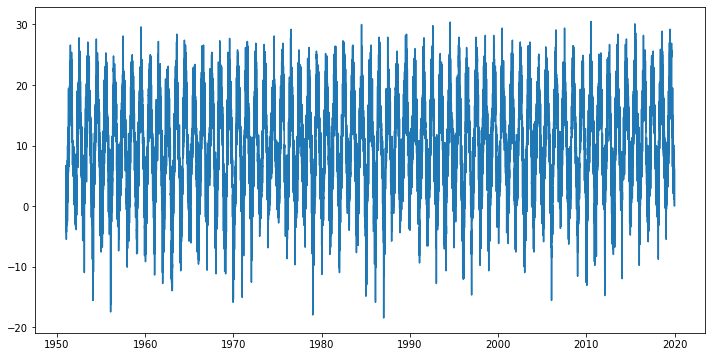

In [13]:
plt.plot(df_1)

In [15]:
# creating timestep from index to calculate any trend, run twice since index Datetime
df_1.reset_index(inplace=True)
df_1.rename(columns={'index':'timestep'}, inplace=True)

In [16]:
# setting index as Date again so can run datetime series functions on it
df_1.set_index('Date', inplace=True)

In [17]:
m = LinearRegression()

X = df_1[['timestep']] 
y = df_1['Temp_C']

m.fit(X, y)

LinearRegression()

<AxesSubplot:xlabel='Date', ylabel='Temp_C'>

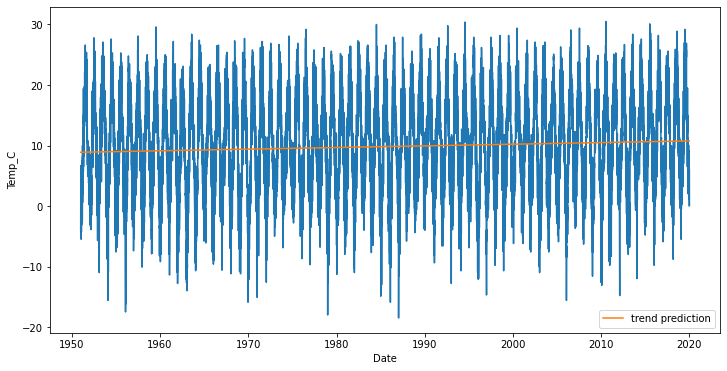

In [18]:
#plotting linear regression with data to see if any trend visible
sns.lineplot(data=df_1.Temp_C)
sns.lineplot(x=df_1.index, y=m.predict(X), label='trend prediction')

Looks like a slight increasing trend, will look at LinReg plot on it's own to see better
Homoscedasticity

<AxesSubplot:xlabel='Date'>

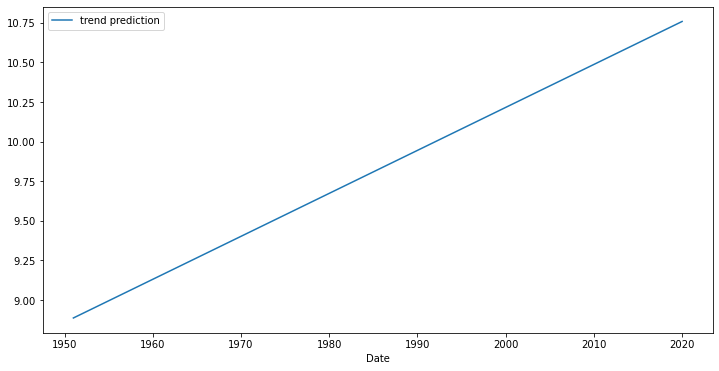

In [19]:
sns.lineplot(x=df_1.index, y=m.predict(X), label='trend prediction')

# Q2) Is There Seasonality In My Data

## Taking Day Of Year as OHC 

In [ ]:
df_2 = raw_data_train
df_2.info()

In [39]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25202 entries, 1951-01-01 to 2019-12-31
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   timestep  25202 non-null  int64  
 1   Temp_C    25202 non-null  float64
 2   DOY       25202 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 787.6+ KB


In [23]:
# Taking DoY for each timestep and convert to string
df_2['DOY'] = df_2.index.day_of_year
df_2['DOY'] = df_2['DOY'].astype(str)

<ipython-input-23-d3691daf98dd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['DOY'] = df_2.index.day_of_year


In [40]:
# check DOY string object for OHC
df_2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25202 entries, 1951-01-01 to 2019-12-31
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   timestep  25202 non-null  int64  
 1   Temp_C    25202 non-null  float64
 2   DOY       25202 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 787.6+ KB


In [41]:
# run dummy OHC on df to keep numerical as is and drop first
df_2 = pd.get_dummies(df_2[['timestep','Temp_C','DOY']], prefix = '', prefix_sep='', drop_first=True)

In [42]:
df_2.head()

,timestep,Temp_C,10,100,101,102,103,104,105,106,...,90,91,92,93,94,95,96,97,98,99
Date,,,,,,,,,,,,,,,,,,,,,
1951-01-01,0,-4.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1951-01-02,1,-1.4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1951-01-03,2,-1.2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1951-01-04,3,0.4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1951-01-05,4,2.5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
# now I want  to fit another model that captures both trend (LinReg) and seasonality (DOY)
X = df_2.drop(['Temp_C'], axis=1)  # features 
y = df_2['Temp_C']

m_trend_seasonal = LinearRegression()  # includes month dummies and timestep

m_trend_seasonal.fit(X, y)  # fit the model

df_2['trend_seasonal'] = m_trend_seasonal.predict(X)  

df_2.head()

,timestep,Temp_C,10,100,101,102,103,104,105,106,...,91,92,93,94,95,96,97,98,99,trend_seasonal
Date,,,,,,,,,,,,,,,,,,,,,
1951-01-01,0,-4.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.530008
1951-01-02,1,-1.4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.187979
1951-01-03,2,-1.2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.441602
1951-01-04,3,0.4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.719863
1951-01-05,4,2.5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.627109


<ipython-input-47-1a4bbf9c3c45>:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  sns.lineplot(data=df_2['1987'].Temp_C)
<ipython-input-47-1a4bbf9c3c45>:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  sns.lineplot(x=df_2['1987'].index, y=df_2['1987'].trend_seasonal, label='trend prediction')


<AxesSubplot:xlabel='Date', ylabel='Temp_C'>

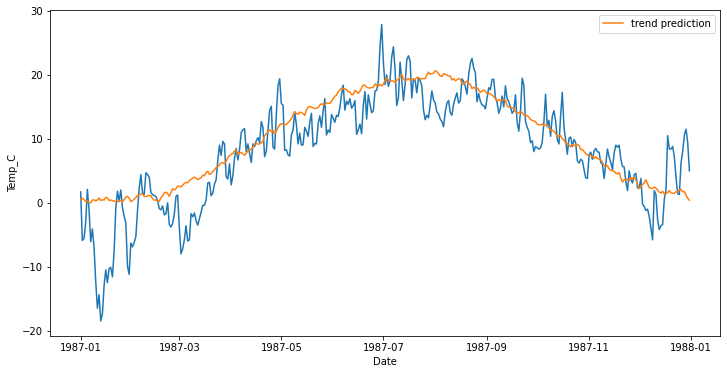

In [47]:
# Plotting new trend lines
sns.lineplot(data=df_2['1987'].Temp_C)
sns.lineplot(x=df_2['1987'].index, y=df_2['1987'].trend_seasonal, label='trend prediction')

<AxesSubplot:xlabel='Date', ylabel='Temp_C'>

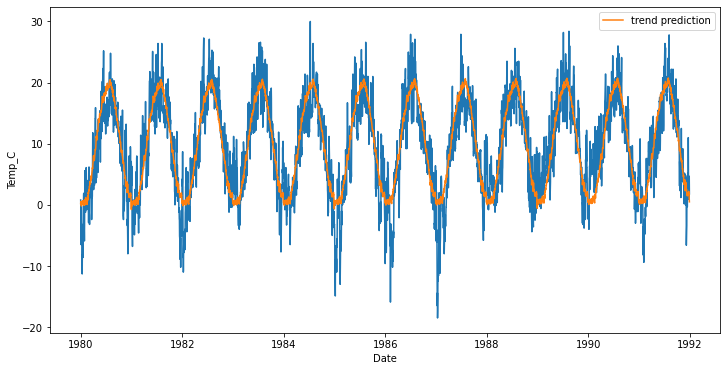

In [58]:
# Plotting new trend lines
sns.lineplot(data=df_2['1980':'1991'].Temp_C)
sns.lineplot(x=df_2['1980':'1991'].index, y=df_2['1980':'1991'].trend_seasonal, label='trend prediction')

## Running model on month OHC

In [50]:
df_3 = raw_data_train
#df_3.info()

df_3.drop('DOY', axis=1, inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [79]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25202 entries, 1951-01-01 to 2019-12-31
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   timestep  25202 non-null  int64  
 1   Temp_C    25202 non-null  float64
 2   Month     25202 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.3+ MB


In [77]:
df_3['Month'] = df_3.index.month
df_3['Month'] = df_3['Month'].astype(str)

In [80]:
df_3 = pd.get_dummies(df_3[['timestep','Temp_C','Month']], prefix = '', prefix_sep='', drop_first=True)

In [81]:
df_3

,timestep,Temp_C,10,11,12,2,3,4,5,6,7,8,9
Date,,,,,,,,,,,,,
1951-01-01,0,-4.0,0,0,0,0,0,0,0,0,0,0,0
1951-01-02,1,-1.4,0,0,0,0,0,0,0,0,0,0,0
1951-01-03,2,-1.2,0,0,0,0,0,0,0,0,0,0,0
1951-01-04,3,0.4,0,0,0,0,0,0,0,0,0,0,0
1951-01-05,4,2.5,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,25197,3.1,0,0,1,0,0,0,0,0,0,0,0
2019-12-28,25198,1.3,0,0,1,0,0,0,0,0,0,0,0
2019-12-29,25199,0.0,0,0,1,0,0,0,0,0,0,0,0


In [88]:
# now I want  to fit another model that captures both trend (LinReg) and seasonality (DOY)
X_3 = df_3.drop(['Temp_C'], axis=1)  # features 
y_3 = df_3['Temp_C']

month_trend_seasonal = LinearRegression()  # includes month dummies and timestep

month_trend_seasonal.fit(X_3, y_3)  # fit the model

df_3['trend_seasonal'] = month_trend_seasonal.predict(X_3)  

df_3.head()

,timestep,Temp_C,10,11,12,2,3,4,5,6,7,8,9,trend_seasonal
Date,,,,,,,,,,,,,,
1951-01-01,0,-4.0,0,0,0,0,0,0,0,0,0,0,0,-0.509811
1951-01-02,1,-1.4,0,0,0,0,0,0,0,0,0,0,0,-0.509740
1951-01-03,2,-1.2,0,0,0,0,0,0,0,0,0,0,0,-0.509668
1951-01-04,3,0.4,0,0,0,0,0,0,0,0,0,0,0,-0.509597
1951-01-05,4,2.5,0,0,0,0,0,0,0,0,0,0,0,-0.509526


<AxesSubplot:xlabel='Date', ylabel='Temp_C'>

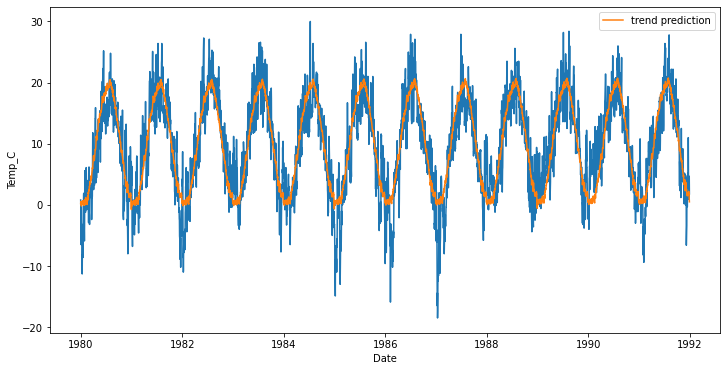

In [83]:
# Plotting new trend lines
sns.lineplot(data=df_2['1980':'1991'].Temp_C)
sns.lineplot(x=df_2['1980':'1991'].index, y=df_2['1980':'1991'].trend_seasonal, label='trend prediction')

<ipython-input-86-070f0afc920e>:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  sns.lineplot(data=df_2['1977'].Temp_C)
<ipython-input-86-070f0afc920e>:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  sns.lineplot(x=df_2['1977'].index, y=df_2['1977'].trend_seasonal, label='trend prediction')


<AxesSubplot:xlabel='Date', ylabel='Temp_C'>

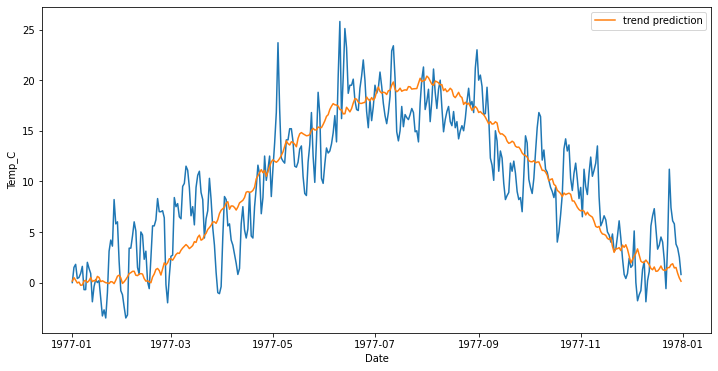

In [86]:
# Plotting new trend lines
sns.lineplot(data=df_2['1977'].Temp_C)
sns.lineplot(x=df_2['1977'].index, y=df_2['1977'].trend_seasonal, label='trend prediction')

In [92]:
# comparing month and day of year models
month_trend_seasonal.score(X_3, y_3), m_trend_seasonal.score(X, y)

(0.7519732593496012, 0.7710181888892217)

Day of Year prediction slighty better than month so will go with that

In [93]:
df_2

,timestep,Temp_C,10,100,101,102,103,104,105,106,...,91,92,93,94,95,96,97,98,99,trend_seasonal
Date,,,,,,,,,,,,,,,,,,,,,
1951-01-01,0,-4.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.530008
1951-01-02,1,-1.4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.187979
1951-01-03,2,-1.2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.441602
1951-01-04,3,0.4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.719863
1951-01-05,4,2.5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.627109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,25197,3.1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.535787
2019-12-28,25198,1.3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.580715
2019-12-29,25199,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.998106


# Q3) Can I extract the remainder to get more accurate model

In [94]:
# calculating the error of our best model so far (trend + seasonality)

df_2['remainder'] = df_2['Temp_C'] - df_2['trend_seasonal']

df_2.head()

,timestep,Temp_C,10,100,101,102,103,104,105,106,...,92,93,94,95,96,97,98,99,trend_seasonal,remainder
Date,,,,,,,,,,,,,,,,,,,,,
1951-01-01,0,-4.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.530008,-3.469992
1951-01-02,1,-1.4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.187979,-1.212021
1951-01-03,2,-1.2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.441602,-0.758398
1951-01-04,3,0.4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.719863,1.119863
1951-01-05,4,2.5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.627109,3.127109


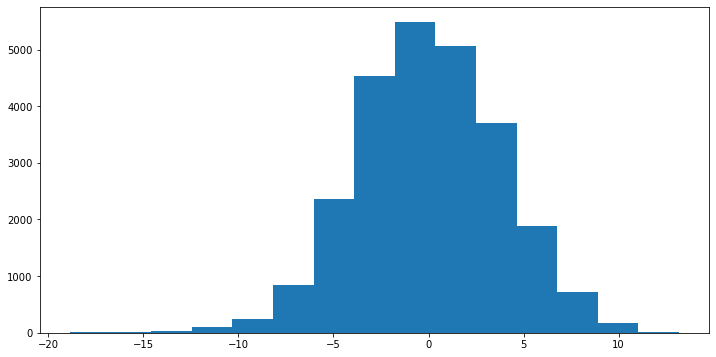

In [97]:
# plotting the distribution of the remainder

plt.hist(df_2['remainder'], bins=15)
plt.show()

In [98]:
df_2['remainder'].std(), df_2['remainder'].mean()

(3.779568306409025, -1.0980467828980558e-15)

In [99]:
# plot and compare with a random signal

df_2['random'] = np.random.normal(loc=0, scale=4, size=df_2.shape[0])

<AxesSubplot:xlabel='Date', ylabel='remainder'>

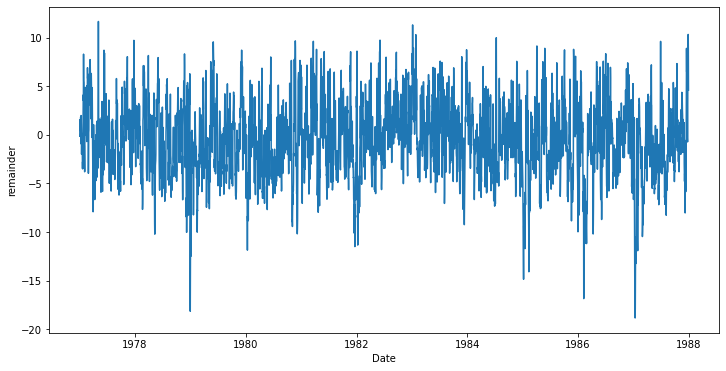

In [106]:
sns.lineplot(data=df_2['1977':'1987'].remainder)

<AxesSubplot:xlabel='Date', ylabel='random'>

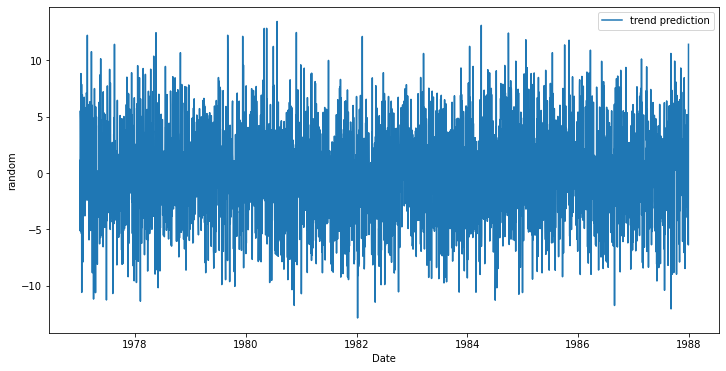

In [107]:
sns.lineplot(x=df_2['1977':'1987'].index, y=df_2['1977':'1987'].random, label='trend prediction')

# Detrending Data & Finding Best Model To Run

## Using Day of Year as Timestep

Plan Pt1

- take only a decade of data for now
- set timestep and apply feature expansion
- fit baseline model based on temp predictions according to timestep

In [ ]:
# df created from one decade of raw data only for simplicity when viewing graphs. Will run final model on entire dataset
df_1 = raw_data['1960':'1969']

In [ ]:
# Pulling out Year and DayOfYear from datetimeseries index  (ignore warnings for now, research best practice for view-Vs-copy later)
df_1['DOY'] = df_1.index.dayofyear
df_1['Year'] = df_1.index.year

In [ ]:
# setting timestep as new column of data (do twice since original index was prev. set as Datetimestamp)
df_1.reset_index(inplace=True)
df_1.rename(columns={'index':'timestep'}, inplace=True)

In [ ]:
# setting index as Date again so can run datetime series functions on it
df_1.set_index('Date')

In [ ]:
# Plot our timeseries for first visualisation
sns.lineplot(data=df_1, x='Date', y='Temp_C')

- From the above plot we can deduce that our data shows seasonality, with a certain degree of fluctuations.
- Suggested autocorrelation too since down-follows-down and up-follows-up
- Now we want to see what trend our data folows (if any) and what the best model will be to fit to it for predictions/forecasts
- There can be benefit in identifying, modeling, and even removing trend information from a time series dataset.

## Modeling The Trend

Types of time series patterns:

    - Trend(T)- reflects the long-term progression of the series. 
    A trend exists when there is a persistent increasing or decreasing direction in the data. 
    The trend component does not have to be linear

    - Cyclic ( C)— reflects repeated but non-periodic fluctuations. 
    The duration of these fluctuations is usually of at least two years

    Seasonal(S)- reflects seasonality present in the Time Series data
    e.g Demand for flip flops, will be highest during the summer season. 
    Seasonality occurs at a fixed period of time could be weekly, monthly, quarterly, etc.

    Random(R) - reflects random or irregular influences. 
    This is residual after we have removed all other components from time-series data

When graphing variables, one of six common trend lines or regressions can be used to describe data.:

    - linear
    - logarithmic
    - polynomial
    - power
    - exponential
    - moving averages


Identifying and understanding trend information can aid in improving model performance; below are a few reasons:

    - Faster Modeling: 
    Perhaps the knowledge of a trend or lack of a trend can suggest methods and make model selection and evaluation more efficient.

    - Simpler Problem: 
    Perhaps we can correct or remove the trend to simplify modeling and improve model performance.
    
    - More Data: 
    Perhaps we can use trend information, directly or as a summary, to provide additional information to the model and improve model performance.

### Modelling The Trend 

In [ ]:
df_1.head()

In [ ]:
# First step to fit a linear function of the timestep to our data to see follows a linear trend (obvs not but good first step)

# Run a Linear Regression

m = LinearRegression()

X = df_1[['timestep']] 
y = df_1['Temp_C']

m.fit(X, y)



In [ ]:
#this graph shows linear regression not a good model to identify trend
sns.lineplot(data=df_1.Temp_C)
sns.lineplot(x=df_1.index, y=m.predict(X), label='trend prediction')

-- LR expected line, Not very convincing. the original trend was not linear to begin with.
Let’s compute the RMSE and the R²-score between the data and the trend we’ve extracted. We will come back to these numbers later.

In [ ]:
# Data obviously not linear but we can do Polynomial FE and then fit LinReg model to pull out any trends

p = PolynomialFeatures(include_bias=False, degree=2)
X_p = df_2[['timestep']] 
p.fit(X_p)

#### when converting datetimeseries not int but object string
### get dummies only encodes objects, not integers

In [ ]:
Xpoly = p.transform(X_p)

In [ ]:
p.get_feature_names()

In [ ]:
df_poly = df_poly.rename({'x0^2': 'X_2'}, axis=1)

In [ ]:
df_poly.drop('x0', axis=1)

In [ ]:
df=df.join(pd.DataFrame(Xpoly,columns=["x_1", "x_2"]))

In [ ]:
sns.lineplot(data=df_poly.Temp_C)
sns.lineplot(x=df.index, y=df_poly['X_2'], label='trend prediction')

In [ ]:
df['timestep_P'] = m.fit_transform(X_p)

In [ ]:
df_poly.columns

In [ ]:
m = LinearRegression()
X = df_poly.drop(columns=['P_trend','x0','remainder','trend_seasonal','timestep','Date', 'Temp_C', 'DOY', 'Year', 'trend',]) 
y = df_poly['Temp_C']
m.fit(X, y)

In [ ]:
df_poly['P_trend']=m.predict(X)

In [ ]:
df

In [ ]:
m.score(X,y)

In [ ]:
sns.lineplot(data=df_poly.Temp_C)
sns.lineplot(x=df_poly.index, y=m.predict(X), label='trend seasonal')

In [ ]:
df_poly['remainder'] = df_poly['Temp_C'] - df_poly['P_trend']

In [ ]:
sns.lineplot(data=df_poly.remainder)

## Modelling The Seasonality

In [ ]:
df

In [ ]:
#Dummy encoding for the days of the year
df=df.join(pd.get_dummies(df['DOY'], drop_first=True))

In [ ]:
df.head()

In [ ]:
# Define X and y

# X is timestep and DOY dummies
X = df.drop(columns=['Date', 'Temp_C', 'DOY', 'Year', 'trend']) 

y= df['Temp_C']

In [ ]:
# Fit the model
m.fit(X,y)

In [ ]:
m.score(X,y)

In [ ]:
sns.lineplot(data=df.Temp_C)
sns.lineplot(x=df.index, y=m.predict(X), label='trend seasonal')

In [ ]:
df['trend_seasonal'] = m.predict(X)

In [ ]:
df.head()

In [ ]:
df['remainder'] = df['Temp_C'] - df['trend_seasonal']

In [ ]:
sns.lineplot(data=df.remainder)

Plotting Remainder

In [ ]:
sd = seasonal_decompose(df['Temp_C'], model='additive')
sd.plot()

## Running polynomial regression without OHC months

In [ ]:
# starting with raw data
df2 = raw_data['1960':'1969']

In [ ]:
# Plot the timeseries
sns.lineplot(data=df2.Temp_C)

In [ ]:
# set timestep and run twice
df2.reset_index(inplace=True)
df2.rename(columns={'index':'timestep'}, inplace=True)

In [ ]:
#checking timestep column generated from index correctly
df2.head()

In [ ]:
# Modelling a Polynomial trend

p = PolynomialFeatures(include_bias=False, degree=2)
X_p = df2[['timestep']] 
p.fit(X_p)

In [ ]:
Xpoly2 = p.transform(X_p)

In [ ]:
p.get_feature_names()

In [ ]:
df2=df2.join(pd.DataFrame(Xpoly2))

In [ ]:
df2.head()

In [ ]:
#df2.rename(columns={'1':'x2'}, inplace=True)
df2.columns.values[3] = "x"

In [ ]:
m = LinearRegression()
X = df2.drop(columns=['timestep','Date', 'Temp_C','x']) 
y = df2['Temp_C']
m.fit(X, y)

In [ ]:
df2['P_trend']=m.predict(X)
m.score(X,y)

In [ ]:
sns.lineplot(data=df2.Temp_C)
#sns.lineplot(x=df2.index, y=df2['P_trend'], label='trend seasonal')